In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
Predict if the mobile can be priced low/med/high/very high. Explore the data to
understand the features and figure out an approach.


In [36]:
dataset = pd.read_csv("dataset.csv")
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
#missing value check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
dataset.shape

(2000, 21)

In [5]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


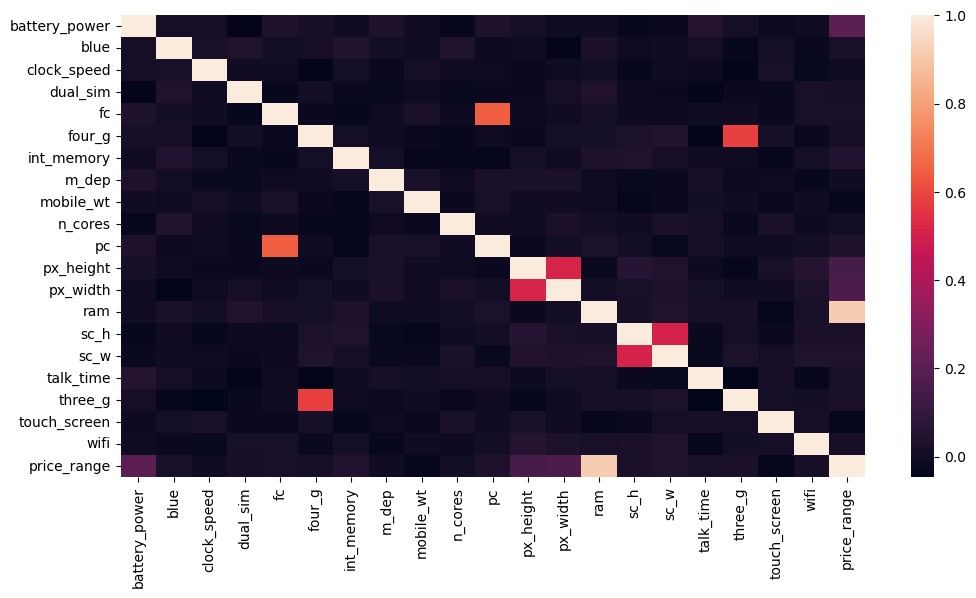

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr())
plt.show()

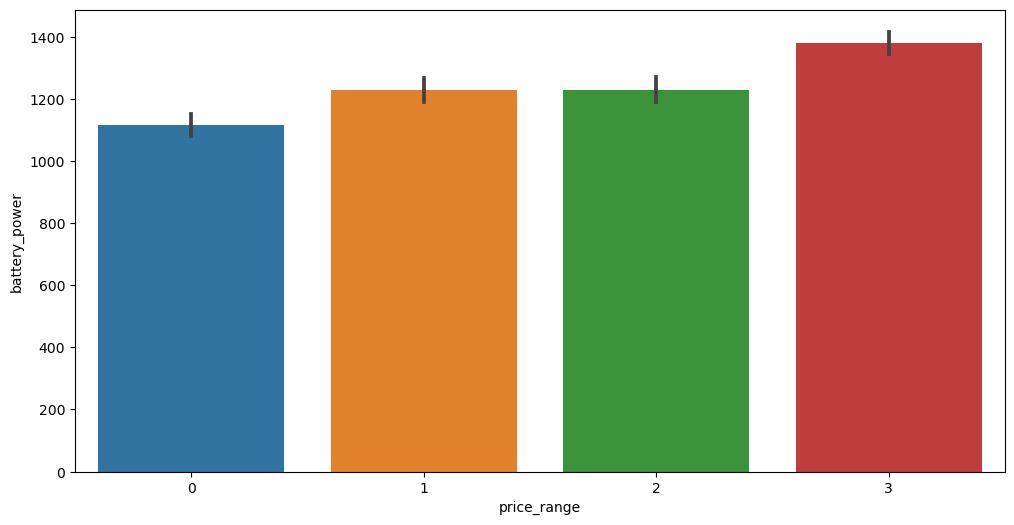

In [8]:
#relation between price range and battery power
plt.figure(figsize=(12,6))
sns.barplot(x="price_range",y="battery_power",data=dataset)
plt.show()

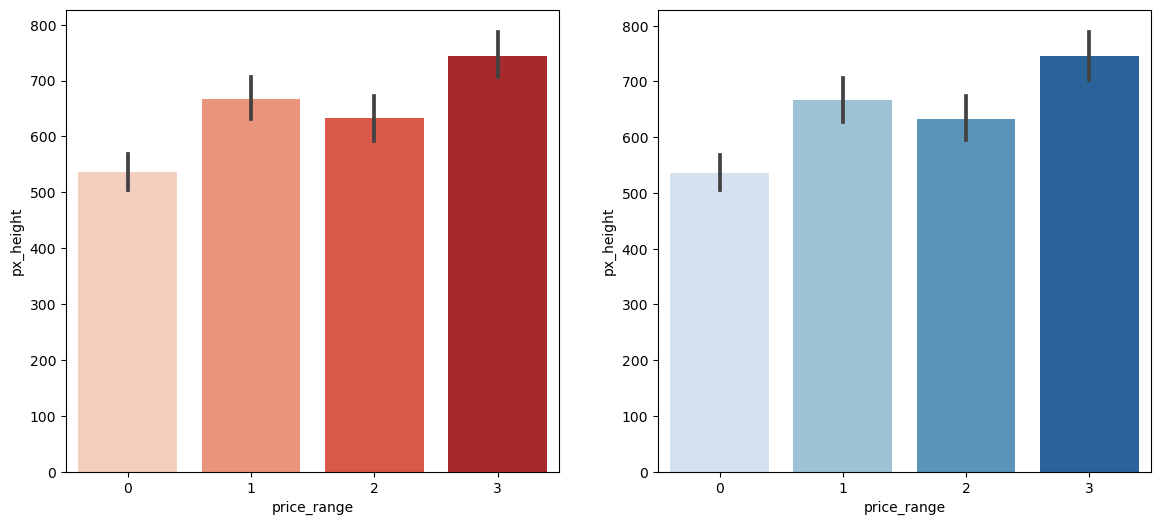

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x="price_range",y="px_height",data=dataset,palette="Reds")
plt.subplot(1,2,2)
sns.barplot(x="price_range",y="px_height",data=dataset,palette="Blues")
plt.show()

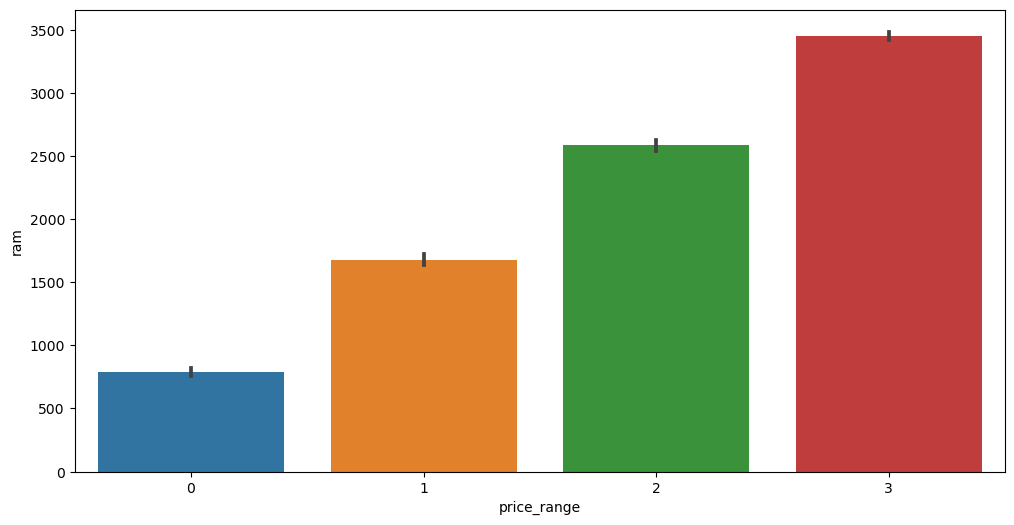

In [11]:
#plotting relation between price range and RAM

plt.figure(figsize=(12,6))
sns.barplot(x="price_range",y="ram",data=dataset)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(dataset["three_g"],hue=dataset["price_range"],palette="pink")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(dataset["four_g"],hue=dataset["price_range"],palette="ocean")
plt.show()

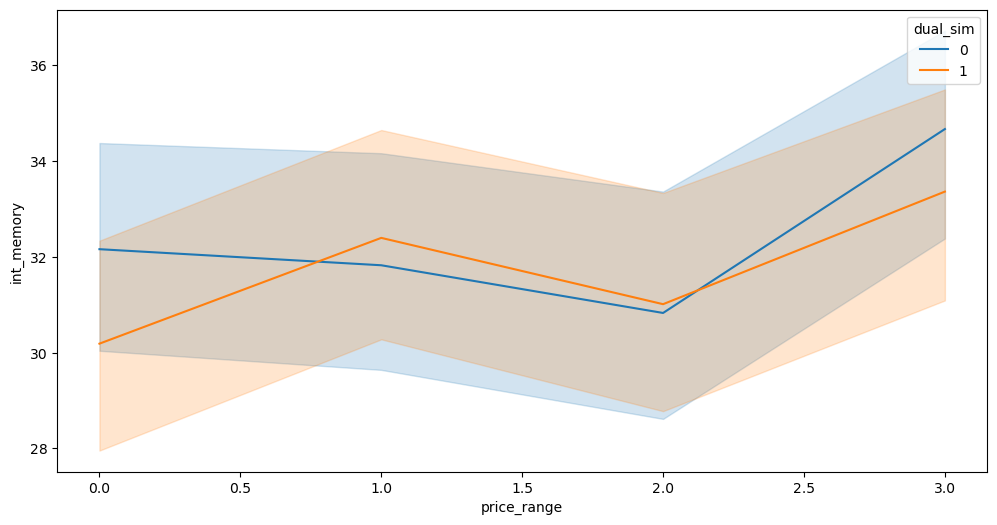

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x="price_range",y="int_memory",data=dataset,hue="dual_sim")
plt.show()

In [37]:
#Data preprocessing
std=StandardScaler()
x=dataset.drop(["price_range"],axis=1)
y=dataset["price_range"]
x=std.fit_transform(x)

Support Vector
89.0


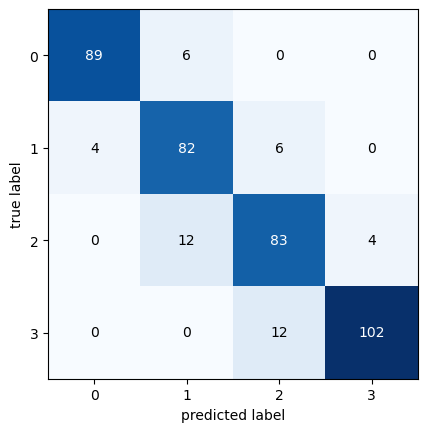



LogisticRegression
95.5


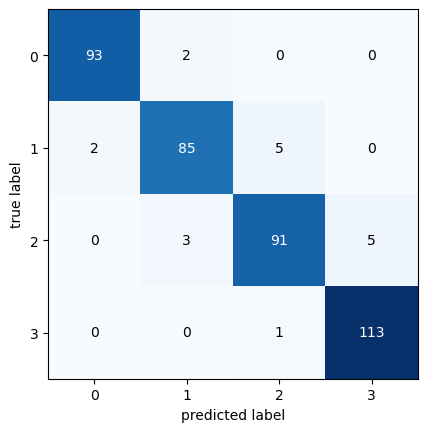



Random Forest
86.75


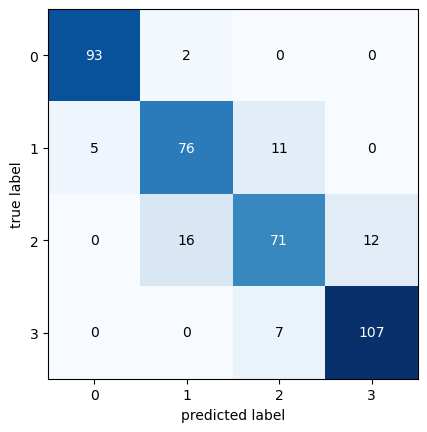



Decision Tree
83.5


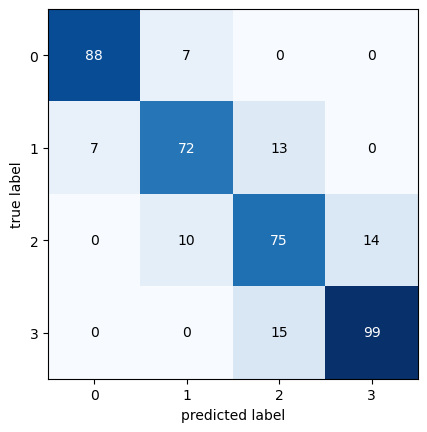



KNeighborsClassifier
51.24999999999999


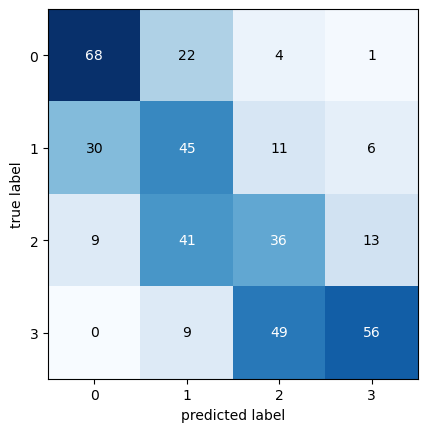



GradientBoostingClassifier
88.0


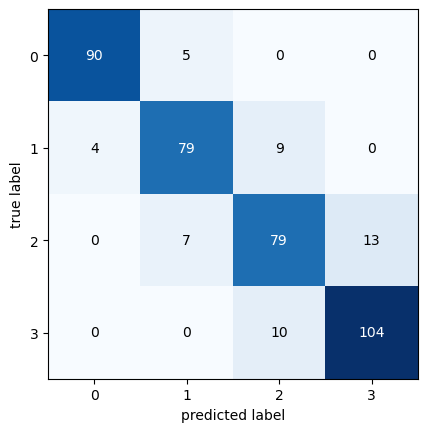

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
models=[[SVC(),"Support Vector"],
       [LogisticRegression(),"LogisticRegression"],
       [RandomForestClassifier(),"Random Forest"],
       [DecisionTreeClassifier(),"Decision Tree"],
       [KNeighborsClassifier(),"KNeighborsClassifier"],
        [GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=10,random_state=0),"GradientBoostingClassifier"]]

for i in models:
    name=i[1]
    model =i[0]
    print(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred)*100)
    cnf=confusion_matrix(y_test,y_pred)
    fig, ax=plot_confusion_matrix(conf_mat=cnf)
    plt.show()
    print("\n")
    
        

In [24]:
#Optimizing best model
hyperparameters={
    "penalty":["l2"],
    "C":[0.01,0.1,10,100]
}
model=LogisticRegression()
grid_search=GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)

{'C': 100, 'penalty': 'l2'}
0.9712500000000001


In [25]:
#model Evalution
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9675


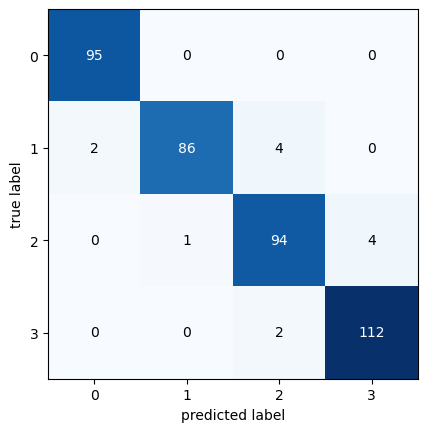

In [26]:
cnf=confusion_matrix(y_test,y_pred)
fig, ax=plot_confusion_matrix(conf_mat=cnf)
plt.show()

In [27]:
import joblib
joblib.dump(model, "mobile_price_model.pkl")

['mobile_price_model.pkl']

In [38]:
feature_names = [
    'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
    'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
    'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
    'talk_time', 'three_g', 'touch_screen', 'wifi'
]

import joblib
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']